In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import levene
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
foto_df = pd.read_csv('/home/jupyter-s.volosjuk-15/STATISTICS/5_task_1.csv')

In [3]:
button_df = pd.read_csv('/home/jupyter-s.volosjuk-15/STATISTICS/5_task_2.csv')

In [4]:
# Итак, первая задача: нужно проверить, какой формат фотографий блюд является наилучшим, т.е. в какой из групп в 
# среднем покупали больше всего. Всего пользователям показывались три варианта:
# A – прямоугольные 16:9
# B – квадратные
# C – прямоугольные 12:4

In [5]:
foto_df.head()

id group  events
0  16046     A      14
1  18712     A      41
2   3268     A      30
3  22633     A      37
4  28071     A      38

In [6]:
foto_df.group.value_counts()

A    10000
B    10000
C    10000
Name: group, dtype: int64

group
A    AxesSubplot(0.125,0.125;0.775x0.755)
B    AxesSubplot(0.125,0.125;0.775x0.755)
C    AxesSubplot(0.125,0.125;0.775x0.755)
Name: events, dtype: object

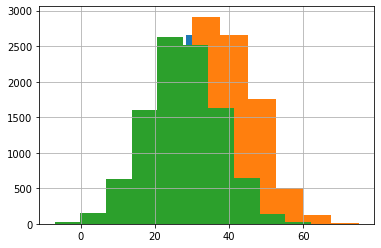

In [7]:
foto_df.groupby('group').events.hist()

In [8]:
foto_df.groupby('group').events.mean()

group
A    29.5796
B    37.6136
C    27.4703
Name: events, dtype: float64

In [9]:
# Проверьте, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена.

In [10]:
foto_df.query('group == "A"').events.to_numpy()

array([14, 41, 30, ..., 30, 21, 21])

In [11]:
levene(foto_df.query('group == "A"').events.to_numpy(), foto_df.query('group == "B"').events.to_numpy(), 
       foto_df.query('group == "C"').events.to_numpy())

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [12]:
# p-value > 0.05, не отклоняем нулевую гипотезу - дисперсии внутри групп примерно одинаковы

In [13]:
# Также убедитесь, что данные распределены нормально, применив тест Шапиро-Уилка. Перед применением критерия при проверке 
# на нормальность обязательно сделайте семплирование (1000 наблюдений), так как на больших выборках могут получаться неверные
# результаты. Для воспроизводимости результата используйте параметр random_state=17 в методе sample.

In [14]:
stats.shapiro(foto_df.query('group == "A"').events.sample(1000, random_state=17)) 
# p > 0.05 - Н0 - не отклоняем, распределение - нормальное

ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)

In [15]:
stats.shapiro(foto_df.query('group == "B"').events.sample(1000, random_state=17)) 
# p > 0.05 - Н0 - не отклоняем, распределение - нормальное

ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)

In [16]:
stats.shapiro(foto_df.query('group == "C"').events.sample(1000, random_state=17))
# p > 0.05 - Н0 - не отклоняем, распределение - нормальное

ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)

In [17]:
# Самое время провести тест! 

In [18]:
stats.f_oneway(foto_df.query('group == "A"').events.to_numpy(), foto_df.query('group == "B"').events.to_numpy(), 
       foto_df.query('group == "C"').events.to_numpy())

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [19]:
# Теперь используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 

In [20]:
print(pairwise_tukeyhsd(foto_df.events, foto_df.group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


In [21]:
# все три группы имеют статистически значимые отличия

In [22]:
# Так какие картинки в итоге будем использовать? 

In [23]:
foto_df.groupby('group').events.mean()

group
A    29.5796
B    37.6136
C    27.4703
Name: events, dtype: float64

In [24]:
foto_df.query('group == "A"').events.sum()


295796

In [25]:
foto_df.query('group == "B"').events.sum()

376136

In [26]:
foto_df.query('group == "C"').events.sum()

274703

In [27]:
print(pairwise_tukeyhsd(foto_df.events, foto_df.group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


In [28]:
# Столбец meandiff отражает различие в средних между второй и первой группой, именно в таком порядке.

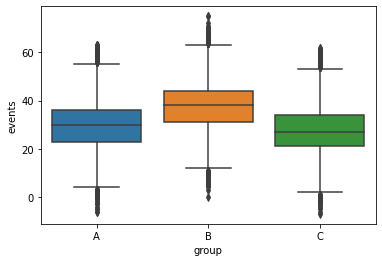

In [29]:
sns.boxplot(x=foto_df.group, y=foto_df.events)

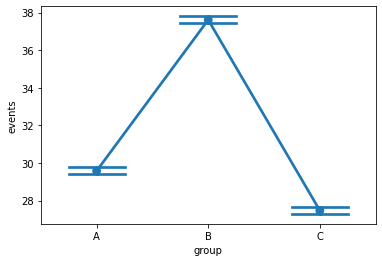

In [32]:
sns.pointplot(x=foto_df.group, y=foto_df.events, capsize= .5)

In [29]:
# лучший результат   B – Квадратные

In [33]:
# Во втором эксперименте требуется проверить, как пользователи отреагируют на изменение формата кнопки оформления заказа, 
# с разбивкой по сегменту клиента.
# Какой метод скорее всего пригодится в данном случае?

In [34]:
# многофакторный дисперсионный анализ

In [35]:
button_df.head()

id group segment  events
0  83440  test    high    78.0
1  96723  test    high    71.0
2  68719  test    high    80.0
3  50399  test    high    80.0
4  95613  test    high    78.0

In [36]:
button_df.segment.value_counts()

low     80000
high    20000
Name: segment, dtype: int64

In [37]:
button_df.group.value_counts()

control    50000
test       50000
Name: group, dtype: int64

In [38]:
# Посмотрим на данные. Для начала визуализируйте распределение events для контрольной и тестовой групп.

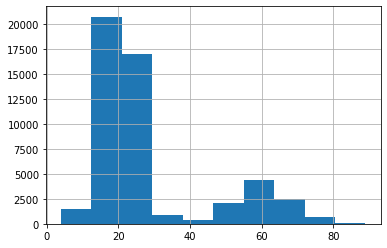

In [39]:
button_df.query('group == "control"').events.hist()

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


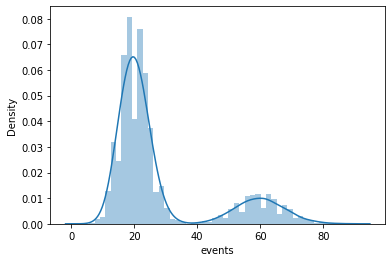

In [40]:
sns.distplot(button_df.query('group == "control"').events)

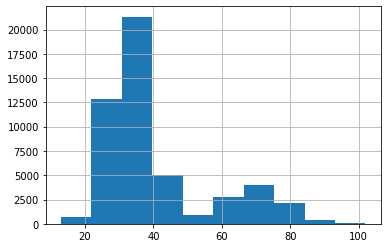

In [41]:
button_df.query('group == "test"').events.hist()

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


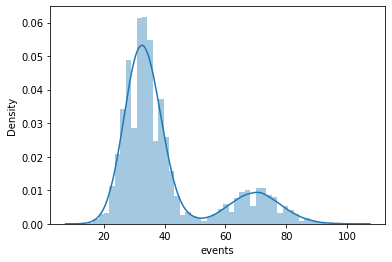

In [42]:
sns.distplot(button_df.query('group == "test"').events)

In [43]:
# Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

In [44]:
button_df.query('group == "control"').groupby('segment').events.describe()

count       mean       std   min   25%   50%   75%   max
segment                                                            
high     10000.0  59.970800  7.805347  31.0  55.0  60.0  65.0  89.0
low      40000.0  20.031575  4.473576   4.0  17.0  20.0  23.0  41.0

In [45]:
button_df.query('group == "test"').groupby('segment').events.describe()

count       mean       std   min   25%   50%   75%    max
segment                                                             
high     10000.0  69.938500  8.403974  40.0  64.0  70.0  76.0  102.0
low      40000.0  33.025925  5.720845  13.0  29.0  33.0  37.0   59.0

In [61]:
button_df.groupby(['group', 'segment']).events.describe().T.round(2)

group     control                test          
segment      high       low      high       low
count    10000.00  40000.00  10000.00  40000.00
mean        59.97     20.03     69.94     33.03
std          7.81      4.47      8.40      5.72
min         31.00      4.00     40.00     13.00
25%         55.00     17.00     64.00     29.00
50%         60.00     20.00     70.00     33.00
75%         65.00     23.00     76.00     37.00
max         89.00     41.00    102.00     59.00

In [47]:
# Почти у цели – осталось выбрать формулу для модели. Напомним, что мы хотим проверить эффект 
# нескольких переменных – group и segment – на events, с взаимодействием факторов.
# Какую формулу используете?

In [48]:
# events ~ segment + group + segment:group

In [49]:
# Проведите тест, а затем используйте критерий Тьюки, чтобы понять между какими группами есть статистически значимые различия.
# В данном случае для последующих сравнений между группами можно проделать следующую операцию: соединить колонки 
# group и segment в combination, чтобы потом передать в аргумент groups в MultiComparison:

In [50]:
formula ='events ~ segment + group + segment:group'

In [51]:
model = ols(formula, button_df).fit()

In [52]:
aov_table = anova_lm(model, typ=2)

In [53]:
print(aov_table)

                     sum_sq       df              F         PR(>F)
segment        2.362480e+07      1.0  689756.377484   0.000000e+00
group          3.837195e+06      1.0  112031.864119   0.000000e+00
segment:group  3.664244e+04      1.0    1069.823273  2.060261e-233
Residual       3.424956e+06  99996.0            NaN            NaN


In [54]:
button_df['combination'] = button_df.group + ' / ' + button_df.segment

In [55]:
button_df.head()

id group segment  events  combination
0  83440  test    high    78.0  test / high
1  96723  test    high    71.0  test / high
2  68719  test    high    80.0  test / high
3  50399  test    high    80.0  test / high
4  95613  test    high    78.0  test / high

In [56]:
print(pairwise_tukeyhsd(button_df.events, button_df.combination))

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2    meandiff p-adj  lower    upper   reject
--------------------------------------------------------------------
control / high control / low -39.9392 0.001 -40.1073 -39.7711   True
control / high   test / high   9.9677 0.001   9.7551  10.1803   True
control / high    test / low -26.9449 0.001  -27.113 -26.7768   True
 control / low   test / high  49.9069 0.001  49.7388   50.075   True
 control / low    test / low  12.9944 0.001   12.888  13.1007   True
   test / high    test / low -36.9126 0.001 -37.0807 -36.7445   True
--------------------------------------------------------------------


In [57]:
# Визуализируйте результаты теста

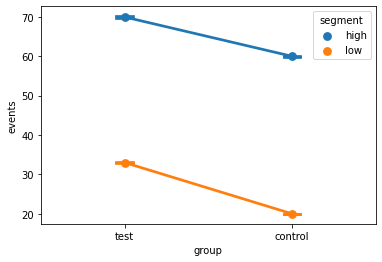

In [62]:
sns.pointplot(x=button_df.group, y=button_df.events, hue=button_df.segment, capsize= .1)

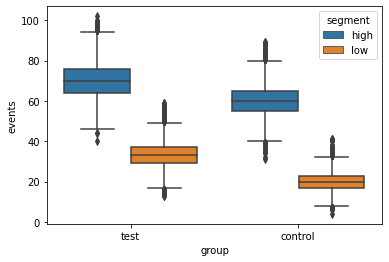

In [59]:
sns.boxplot(x=button_df.group, y=button_df.events, hue=button_df.segment)